# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+SPIRE_SSDF_cat.fits')


In [3]:
cat[0:10]

<Table length=10>
          HELP_ID                   RA         ... Pval_res_350 Pval_res_500
                                 degrees       ...                          
          bytes27                float64       ...   float32      float32   
--------------------------- ------------------ ... ------------ ------------
HELP_J000436.836-604844.377 1.1534850499967266 ...          0.0          0.0
HELP_J000436.954-604832.515 1.1539747923964878 ...          0.0          0.0
HELP_J000437.006-604830.676 1.1541907923964878 ...          0.0          0.0
HELP_J000437.241-604829.390  1.155168779412869 ...          0.0          0.0
HELP_J000437.451-604825.942 1.1560457923964877 ...          0.0          0.0
HELP_J000437.912-604825.664 1.1579667923964878 ...          0.0          0.0
HELP_J000438.471-604831.846 1.1602937923964878 ...          0.0          0.0
HELP_J000440.003-604845.022 1.1666810257540317 ...          0.0          0.0
HELP_J000440.260-604843.056 1.1677507923964878 ...          0.0          0.0
HELP_J000445.006-604746.489 1.1875257923964877 ...          0.0          0.0

## Look at Symmetry of PDFs to determine depth level of catalogue

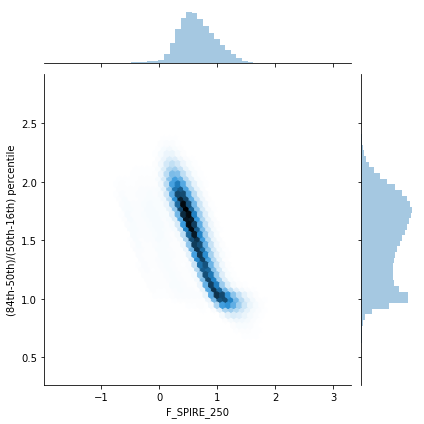

In [4]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

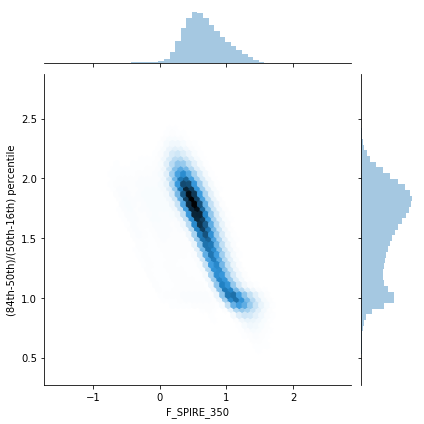

In [5]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

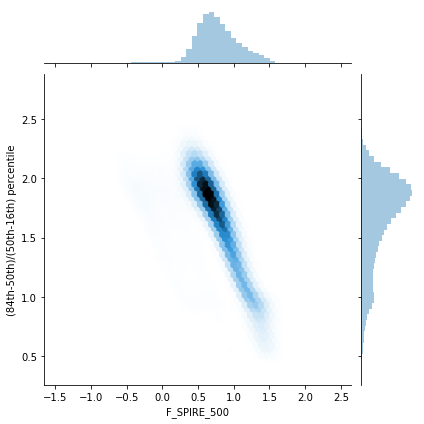

In [6]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

## Add flag to catalogue

In [7]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [8]:
ind_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 10)
ind_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 10)
ind_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 10)



In [9]:
print(ind_250.sum(),ind_350.sum(),ind_500.sum(),len(cat))

3745899 3726050 3513608 4395253


In [10]:
cat['flag_spire_250'][ind_250]=True
cat['flag_spire_350'][ind_350]=True
cat['flag_spire_500'][ind_500]=True

In [12]:
cat.write('./data/dmu26_XID+SPIRE_SSDF_cat_20200109.fits', format='fits',overwrite=True)


In [13]:
ind_good=cat['flag_spire_250'] | cat['flag_spire_350'] | cat['flag_spire_500']

In [14]:
np.invert(ind_good).sum()

239781

In [15]:
cat[np.invert(ind_good)][0:10]

<Table length=10>
          HELP_ID                   RA         ... flag_spire_350 flag_spire_500
                                 degrees       ...                              
          bytes27                float64       ...      bool           bool     
--------------------------- ------------------ ... -------------- --------------
HELP_J000350.061-603555.043 0.9585867923964878 ...          False          False
HELP_J000358.553-603434.385 0.9939697923964879 ...          False          False
HELP_J000359.297-603508.045 0.9970707923964878 ...          False          False
HELP_J000403.572-603539.235  1.014881792396488 ...          False          False
HELP_J000408.018-603641.387 1.0334082444089219 ...          False          False
HELP_J000414.574-603444.929 1.0607237923964878 ...          False          False
HELP_J000416.017-603522.026 1.0667368466051146 ...          False          False
HELP_J000419.949-603520.710 1.0831197923964877 ...          False          False
HELP_J000420.722-603654.688 1.0863417923964878 ...          False          False
HELP_J000422.886-603248.052 1.0953597923964877 ...          False          False

Check PVal maps


In [16]:
import seaborn as sns
import aplpy
import matplotlib.pyplot as plt

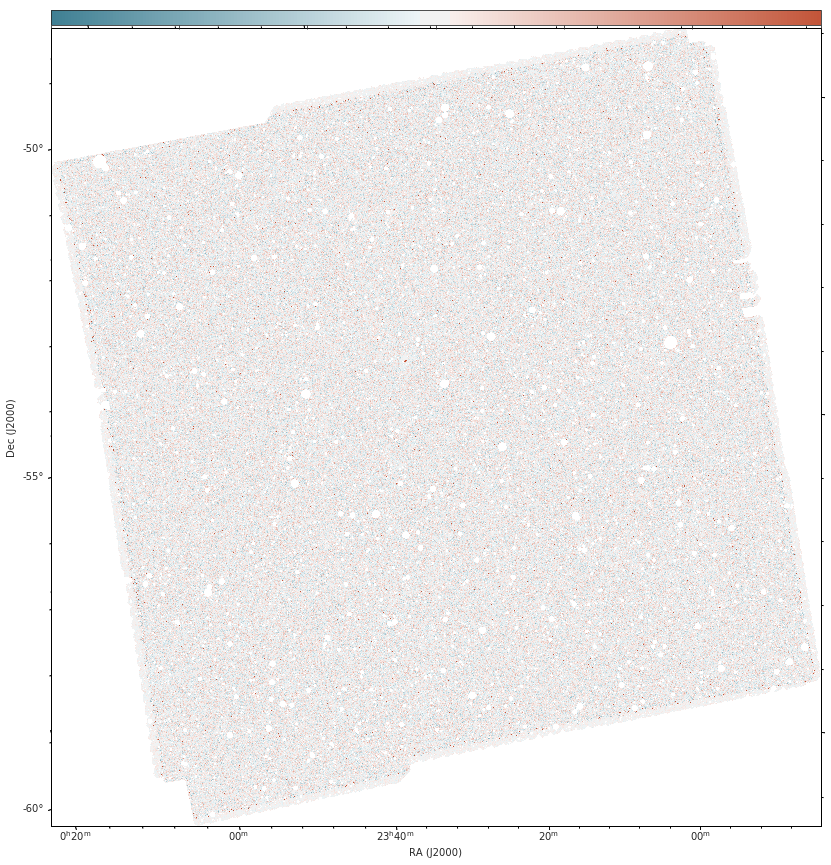

In [17]:
sns.set_style("white")
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig = plt.figure(figsize=(15, 15))
Bayes_p_map=aplpy.FITSFigure('./data/dmu26_XID+SPIRE_psw_SSDF_Bayes_Pval.fits', figure=fig)
Bayes_p_map.show_colorscale(vmin=-6, vmax=6, cmap=cmap)
Bayes_p_map.add_colorbar()
Bayes_p_map.colorbar.set_location('top')

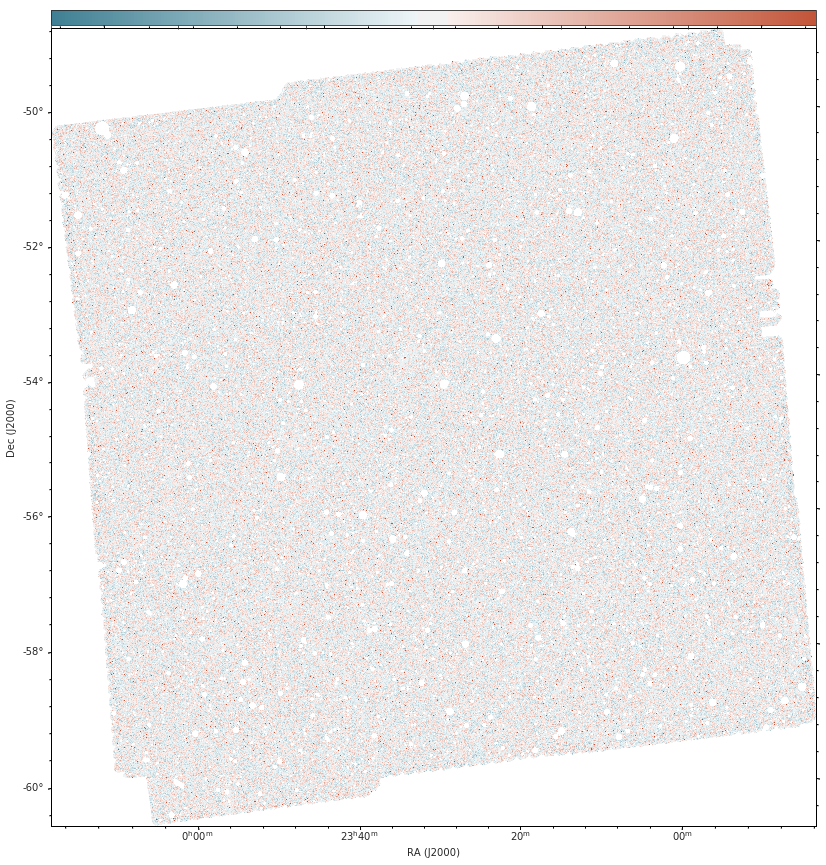

In [6]:
sns.set_style("white")
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig = plt.figure(figsize=(15, 15))
Bayes_p_map=aplpy.FITSFigure('./data/dmu26_XID+SPIRE_pmw_SSDF_Bayes_Pval.fits', figure=fig)
Bayes_p_map.show_colorscale(vmin=-6, vmax=6, cmap=cmap)
Bayes_p_map.add_colorbar()
Bayes_p_map.colorbar.set_location('top')

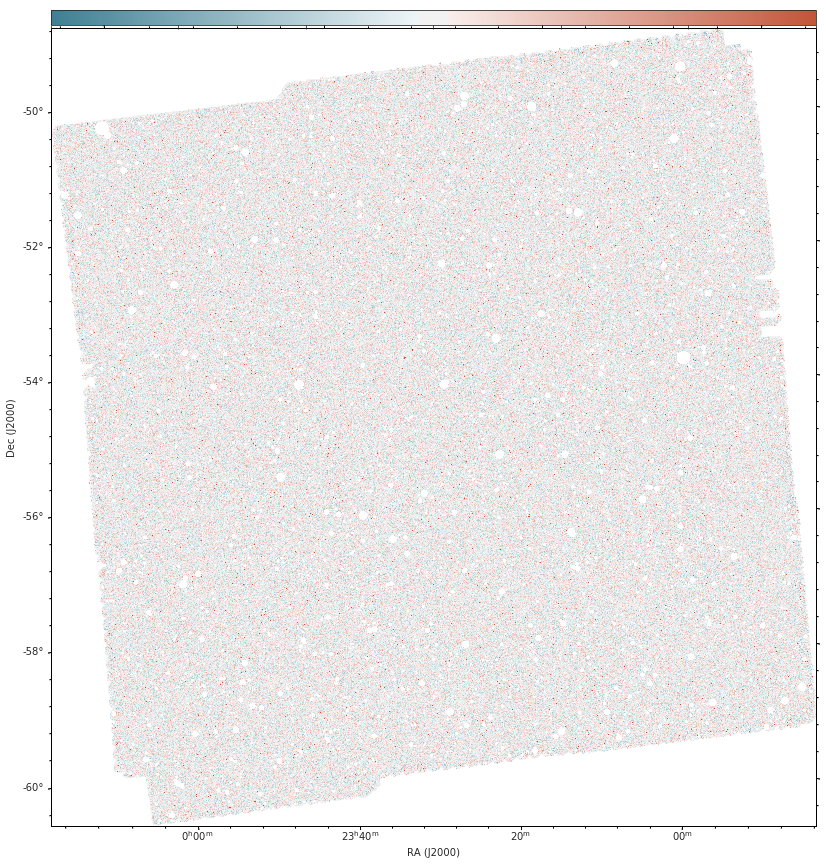

In [7]:
sns.set_style("white")
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig = plt.figure(figsize=(15, 15))
Bayes_p_map=aplpy.FITSFigure('./data/dmu26_XID+SPIRE_plw_SSDF_Bayes_Pval.fits', figure=fig)
Bayes_p_map.show_colorscale(vmin=-6, vmax=6, cmap=cmap)
Bayes_p_map.add_colorbar()
Bayes_p_map.colorbar.set_location('top')

In [18]:
import matplotlib.pyplot as plt

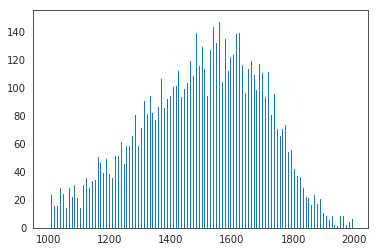

In [23]:
plt.hist(cat['n_eff_SPIRE_250'], bins=np.arange(1000,2000,5));

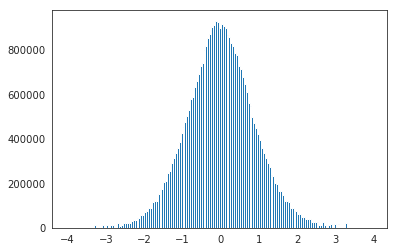

In [26]:
from astropy.io import fits
import pylab as plt
SPIRE_pval=fits.open('./data/dmu26_XID+SPIRE_psw_SSDF_Bayes_Pval.fits')

plt.hist(SPIRE_pval[1].data[np.isfinite(SPIRE_pval[1].data)],bins=np.arange(-4,4,0.05));